In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/pfa_data/trafficData158324.csv')

In [ ]:
data.head(5)

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,74,50,668,74,2014-08-01T07:50:00,5,20746220,158324
1,OK,73,50,668,73,2014-08-01T07:55:00,6,20746392,158324
2,OK,61,60,668,61,2014-08-01T08:00:00,4,20746723,158324
3,OK,61,60,668,61,2014-08-01T08:05:00,1,20747172,158324
4,OK,63,58,668,63,2014-08-01T08:10:00,3,20747545,158324


In [ ]:
data.tail(5)

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
16934,OK,55,67,668,55,2014-09-30T23:25:00,0,28061248,158324
16935,OK,55,67,668,55,2014-09-30T23:30:00,0,28061682,158324
16936,OK,55,67,668,55,2014-09-30T23:40:00,0,28062513,158324
16937,OK,55,67,668,55,2014-09-30T23:50:00,0,28063353,158324
16938,OK,55,67,668,55,2014-09-30T23:55:00,0,28063797,158324


In [ ]:
data.shape

(16939, 9)

In [ ]:
data.columns

Index(['status', 'avgMeasuredTime', 'avgSpeed', 'extID', 'medianMeasuredTime',
       'TIMESTAMP', 'vehicleCount', '_id', 'REPORT_ID'],
      dtype='object')

In [ ]:
data.isna().sum()

status                0
avgMeasuredTime       0
avgSpeed              0
extID                 0
medianMeasuredTime    0
TIMESTAMP             0
vehicleCount          0
_id                   0
REPORT_ID             0
dtype: int64

In [ ]:
data.duplicated().sum()

4

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

**EDA**

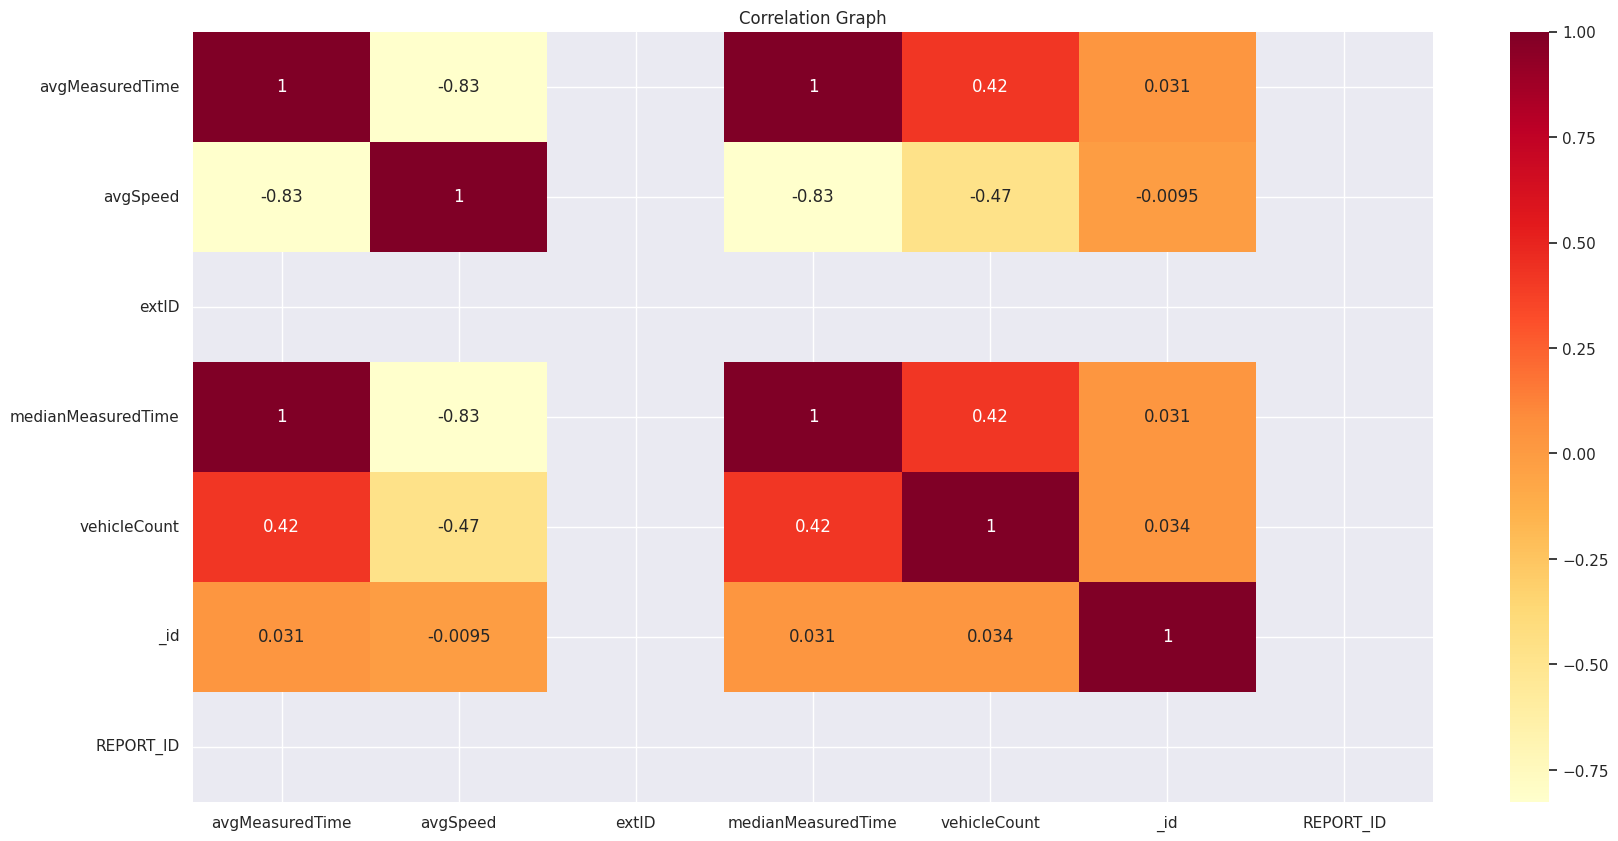

In [ ]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(data.drop(columns=["TIMESTAMP","status"],axis=1).corr(), cmap='YlOrRd', annot=True)
plt.title('Correlation Graph')
plt.show()

In [ ]:
data_v1=data.copy()

In [ ]:
data['Dates'] = pd.to_datetime(data['TIMESTAMP']).dt.date
data['Time'] = pd.to_datetime(data['TIMESTAMP']).dt.time

In [ ]:
data=data.drop('TIMESTAMP', axis=1)

In [ ]:
data.head(5)

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,vehicleCount,_id,REPORT_ID,Dates,Time
0,OK,74,50,668,74,5,20746220,158324,2014-08-01,07:50:00
1,OK,73,50,668,73,6,20746392,158324,2014-08-01,07:55:00
2,OK,61,60,668,61,4,20746723,158324,2014-08-01,08:00:00
3,OK,61,60,668,61,1,20747172,158324,2014-08-01,08:05:00
4,OK,63,58,668,63,3,20747545,158324,2014-08-01,08:10:00


In [ ]:
data=data.drop(['extID', 'status','_id','REPORT_ID'],axis=1)

In [ ]:
data.head(5)

,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount,Dates,Time
0,74,50,74,5,2014-08-01,07:50:00
1,73,50,73,6,2014-08-01,07:55:00
2,61,60,61,4,2014-08-01,08:00:00
3,61,60,61,1,2014-08-01,08:05:00
4,63,58,63,3,2014-08-01,08:10:00


In [ ]:
data['Dates'] = pd.to_datetime(data['Dates'])

In [ ]:
#extraction of yyyy,mm,dd,dayofweek
data['day'] = data['Dates'].dt.day
data['month'] =data['Dates'].dt.month
data['year'] = data['Dates'].dt.year
data['dayofweek'] = data['Dates'].dt.dayofweek

<Axes: >

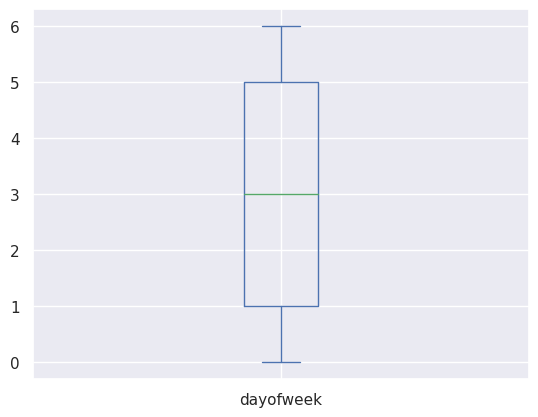

In [ ]:
data.dayofweek.plot(kind='box')

In [ ]:
data=data.drop('Dates',axis=1)

In [ ]:
data.head(5)

,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount,Time,day,month,year,dayofweek
0,74,50,74,5,07:50:00,1,8,2014,4
1,73,50,73,6,07:55:00,1,8,2014,4
2,61,60,61,4,08:00:00,1,8,2014,4
3,61,60,61,1,08:05:00,1,8,2014,4
4,63,58,63,3,08:10:00,1,8,2014,4


In [ ]:
data['Time'] = pd.to_datetime(data['Time'], format="%H:%M:%S")

In [ ]:
print(data['Time'].dtype)

datetime64[ns]


In [ ]:
data.head(5)

,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount,Time,day,month,year,dayofweek
0,74,50,74,5,1900-01-01 07:50:00,1,8,2014,4
1,73,50,73,6,1900-01-01 07:55:00,1,8,2014,4
2,61,60,61,4,1900-01-01 08:00:00,1,8,2014,4
3,61,60,61,1,1900-01-01 08:05:00,1,8,2014,4
4,63,58,63,3,1900-01-01 08:10:00,1,8,2014,4


In [ ]:
data['Time'] = pd.to_datetime(data['Time'])

In [ ]:
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute

In [ ]:
data.head(5)

,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount,Time,day,month,year,dayofweek,hour,minute
0,74,50,74,5,1900-01-01 07:50:00,1,8,2014,4,7,50
1,73,50,73,6,1900-01-01 07:55:00,1,8,2014,4,7,55
2,61,60,61,4,1900-01-01 08:00:00,1,8,2014,4,8,0
3,61,60,61,1,1900-01-01 08:05:00,1,8,2014,4,8,5
4,63,58,63,3,1900-01-01 08:10:00,1,8,2014,4,8,10


In [ ]:
data=data.drop('Time',axis=1)

In [ ]:
data.dtypes

avgMeasuredTime       int64
avgSpeed              int64
medianMeasuredTime    int64
vehicleCount          int64
day                   int32
month                 int32
year                  int32
dayofweek             int32
hour                  int32
minute                int32
dtype: object

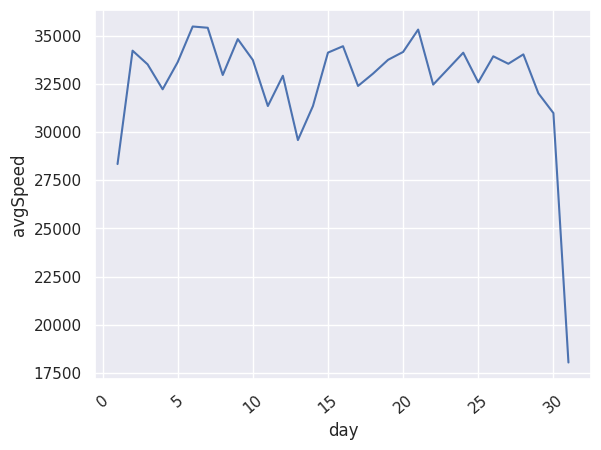

In [ ]:
plt.figure()
plt.plot(data.groupby(by='day')['avgSpeed'].sum().index,data.groupby(by='day')['avgSpeed'].sum())

plt.xticks(rotation=40)
plt.xlabel('day')
plt.ylabel('avgSpeed')

plt.show()

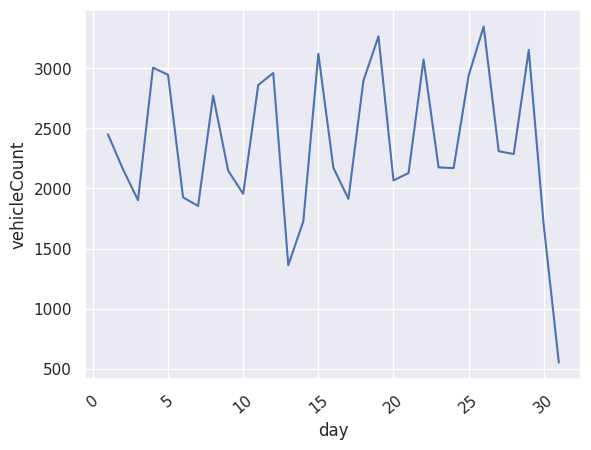

In [ ]:
plt.figure()
plt.plot(data.groupby(by='day')['vehicleCount'].sum().index,data.groupby(by='day')['vehicleCount'].sum())

plt.xticks(rotation=40)
plt.xlabel('day')
plt.ylabel('vehicleCount')

plt.show()

In [ ]:
data=data.drop('medianMeasuredTime',axis=1)

In [ ]:
data.head(5)

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute
0,74,50,5,1,8,2014,4,7,50
1,73,50,6,1,8,2014,4,7,55
2,61,60,4,1,8,2014,4,8,0
3,61,60,1,1,8,2014,4,8,5
4,63,58,3,1,8,2014,4,8,10


<Axes: >

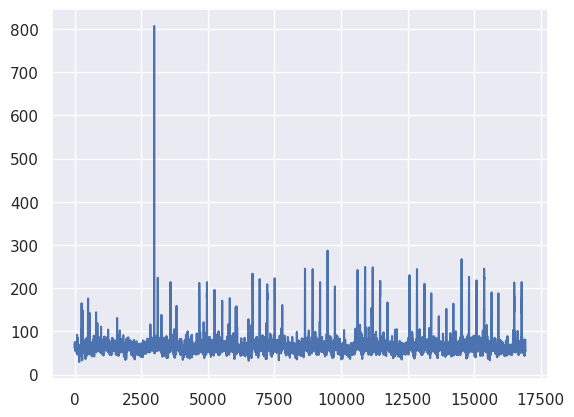

In [ ]:
data.avgMeasuredTime.plot(kind="line")

In [ ]:
data.avgMeasuredTime.max()

807

In [ ]:
data.loc[data["avgMeasuredTime"]==807,:]

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute
2984,807,4,2,11,8,2014,0,18,40


In [ ]:
data.loc[2984,["avgMeasuredTime","avgSpeed"]] = data.loc[2985,["avgMeasuredTime","avgSpeed"]]

In [ ]:
data.loc[[2984,2985],:]

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute
2984,51,72,2,11,8,2014,0,18,40
2985,51,72,2,11,8,2014,0,18,45


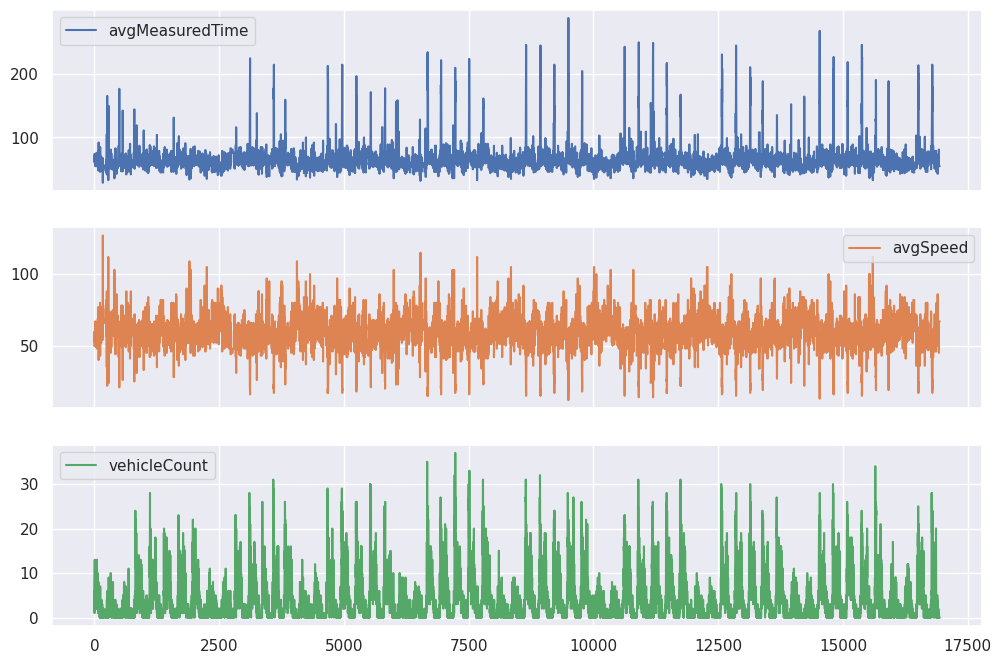

In [ ]:
plot_cols = ['avgMeasuredTime', 'avgSpeed', 'vehicleCount']
plot_features = data[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

 ```
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'scatter' : scatter plot (DataFrame only)
 |      - 'hexbin' : hexbin plot (DataFrame only)
 ```


<Axes: ylabel='Frequency'>

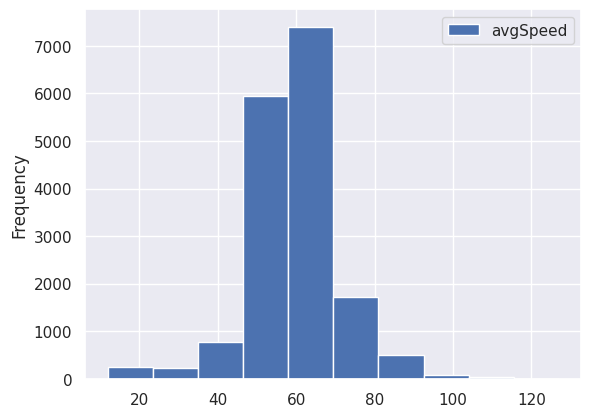

In [ ]:
data.plot(x="vehicleCount",y="avgSpeed",kind="hist")

<Axes: ylabel='Density'>

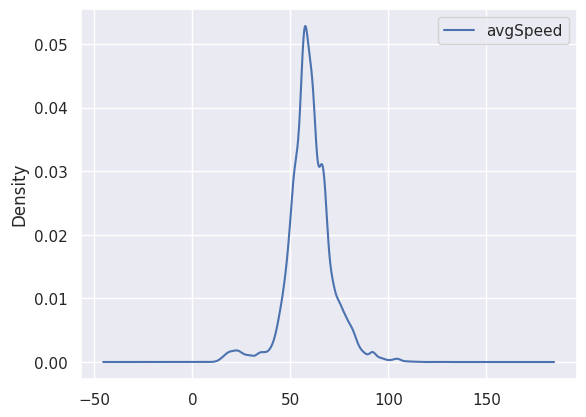

In [ ]:
data.plot(x="vehicleCount",y="avgSpeed",kind="density")

<Axes: xlabel='vehicleCount', ylabel='avgSpeed'>

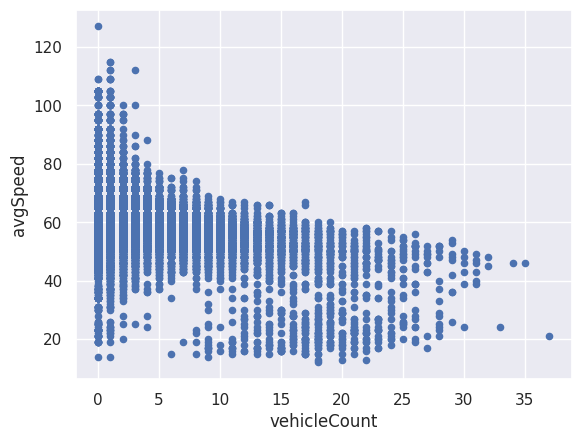

In [ ]:
data.plot(x="vehicleCount",y="avgSpeed",kind="scatter")

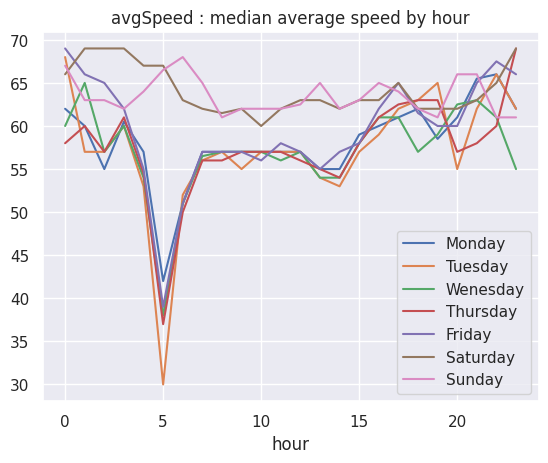

In [ ]:
result = pd.pivot_table(data, index="hour", values=['avgSpeed'],columns=['dayofweek'], aggfunc=np.median,margins=False,dropna=False)
result.columns = ['Monday','Tuesday','Wenesday','Thursday','Friday','Saturday','Sunday']
result.plot(title='{} : median average speed by hour'.format('avgSpeed'))
plt.show()

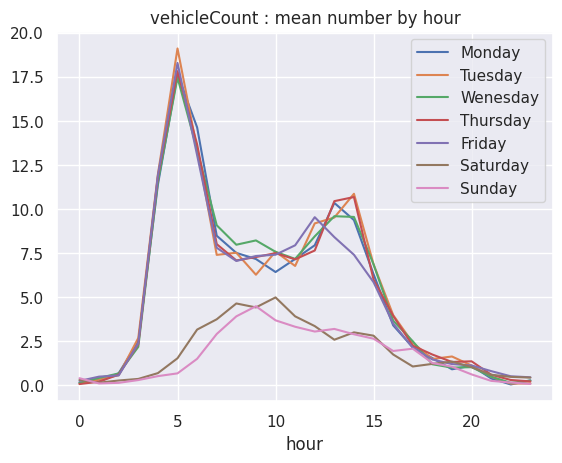

In [ ]:
result = pd.pivot_table(data, index="hour", values=["vehicleCount"],columns=['dayofweek'], aggfunc=np.mean,margins=False,dropna=False)
result.columns = ['Monday','Tuesday','Wenesday','Thursday','Friday','Saturday','Sunday']
result.plot(title='{} : mean number by hour'.format("vehicleCount"))
plt.show()

In [ ]:
data["weekend"] = data["dayofweek"]>=5
data["weekend"] = data["weekend"].astype(int)
data

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute,weekend
0,74,50,5,1,8,2014,4,7,50,0
1,73,50,6,1,8,2014,4,7,55,0
2,61,60,4,1,8,2014,4,8,0,0
3,61,60,1,1,8,2014,4,8,5,0
4,63,58,3,1,8,2014,4,8,10,0
...,...,...,...,...,...,...,...,...,...,...
16934,55,67,0,30,9,2014,1,23,25,0
16935,55,67,0,30,9,2014,1,23,30,0
16936,55,67,0,30,9,2014,1,23,40,0
16937,55,67,0,30,9,2014,1,23,50,0


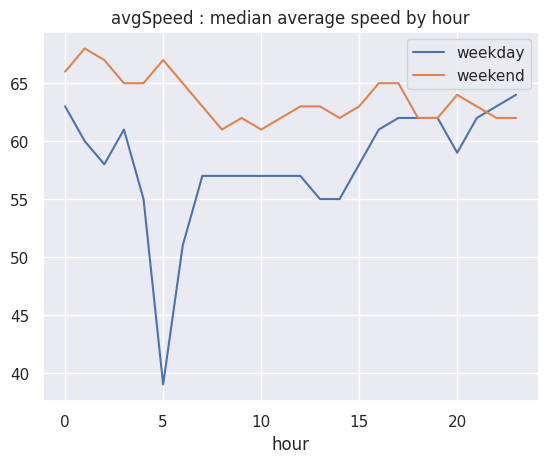

In [ ]:
result = pd.pivot_table(data, index="hour", values=['avgSpeed'],columns=['weekend'], aggfunc=np.median,margins=False,dropna=False)
result.columns = ['weekday','weekend']
result.plot(title='{} : median average speed by hour'.format('avgSpeed'))
plt.show()

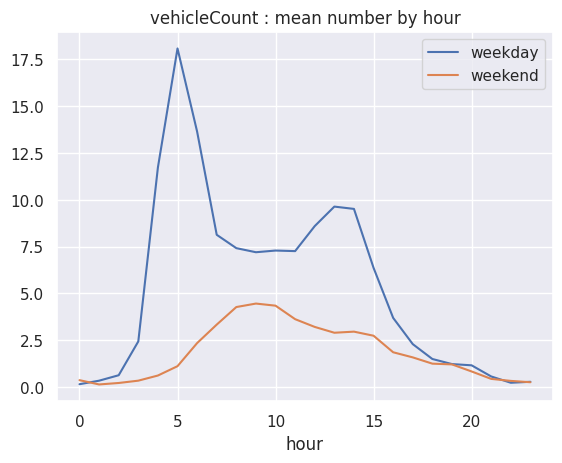

In [ ]:
result = pd.pivot_table(data, index="hour", values=["vehicleCount"],columns=['weekend'], aggfunc=np.mean,margins=False,dropna=False)
result.columns = ['weekday','weekend']
result.plot(title='{} : mean number by hour'.format("vehicleCount"))
plt.show()

In [ ]:
# !pip install -q ydata-profiling

In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data,title='traffic flow')
# profile.to_notebook_iframe()

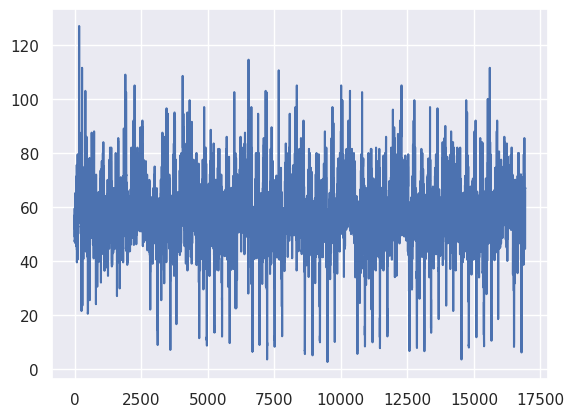

In [ ]:
plt.plot(data["avgSpeed"]- 0.47*data["vehicleCount"])

In [ ]:
data["traffic"] = data["avgSpeed"]- 0.47*data["vehicleCount"]>70
data["traffic"] = data["traffic"].astype(int)
data

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute,weekend,traffic
0,74,50,5,1,8,2014,4,7,50,0,0
1,73,50,6,1,8,2014,4,7,55,0,0
2,61,60,4,1,8,2014,4,8,0,0,0
3,61,60,1,1,8,2014,4,8,5,0,0
4,63,58,3,1,8,2014,4,8,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16934,55,67,0,30,9,2014,1,23,25,0,0
16935,55,67,0,30,9,2014,1,23,30,0,0
16936,55,67,0,30,9,2014,1,23,40,0,0
16937,55,67,0,30,9,2014,1,23,50,0,0


<Axes: ylabel='count'>

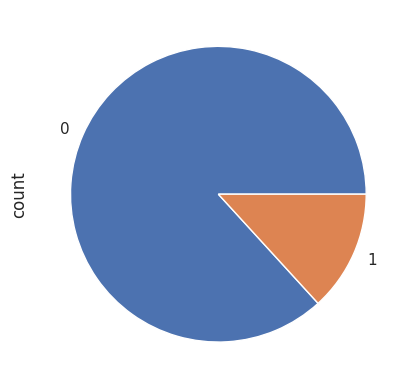

In [ ]:
data["traffic"].value_counts().plot(kind='pie')

# AI

In [ ]:
data

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute,weekend,traffic
0,74,50,5,1,8,2014,4,7,50,0,0
1,73,50,6,1,8,2014,4,7,55,0,0
2,61,60,4,1,8,2014,4,8,0,0,0
3,61,60,1,1,8,2014,4,8,5,0,0
4,63,58,3,1,8,2014,4,8,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16934,55,67,0,30,9,2014,1,23,25,0,0
16935,55,67,0,30,9,2014,1,23,30,0,0
16936,55,67,0,30,9,2014,1,23,40,0,0
16937,55,67,0,30,9,2014,1,23,50,0,0


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import RNN,LSTM,GRU, Dense,Flatten
from keras.callbacks import EarlyStopping

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
df = data.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers = []
for x in df :
  sc = MinMaxScaler()
  df[x] = sc.fit_transform(data[[x]])
  scalers.append(sc)

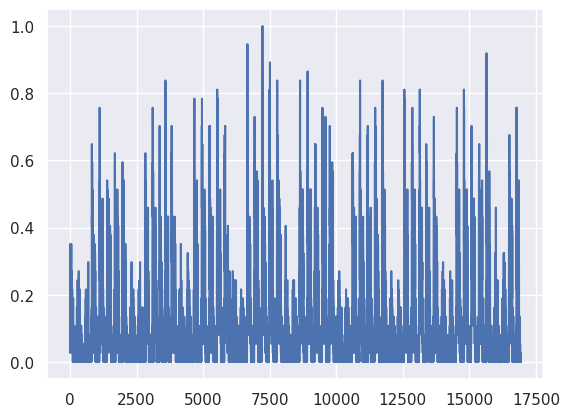

In [ ]:
plt.plot(df.vehicleCount)

In [ ]:
#i = scalers[2].inverse_transform(df[["vehicleCount"]])
#plt.plot(i)

In [ ]:
data.columns

Index(['avgMeasuredTime', 'avgSpeed', 'vehicleCount', 'day', 'month', 'year',
       'dayofweek', 'hour', 'minute', 'weekend', 'traffic'],
      dtype='object')

In [ ]:
# process the data(we use a scaled data(df))
from tqdm import tqdm
X = []
Y = []
WINDOW_SIZE = 12 # 12 * 5 min = 1 hour
input_columns = ["avgSpeed","vehicleCount"]
target_columns = ["avgSpeed","vehicleCount"]
for i in tqdm(range(len(df)-WINDOW_SIZE)):
  x = df.loc[i:i+WINDOW_SIZE-1,input_columns].values
  y = df.loc[i+WINDOW_SIZE,target_columns].values
  X.append(x)
  Y.append(y)


100%|██████████| 16923/16923 [00:37<00:00, 452.11it/s]


In [ ]:
x_train  = X[:-1000]
x_test = X[-1000:]
y_train = Y[:-1000]
y_test = Y[-1000:]

In [ ]:
def convert(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg

In [ ]:
x_test = convert(x_test)
x_train = convert(x_train)
y_train = convert(y_train)
y_test = convert(y_test)

In [ ]:
x_train[0].shape

TensorShape([12, 2])

In [ ]:
y_train[0].shape

TensorShape([2])

# LSTM

In [ ]:
model = Sequential([
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32,input_shape=[13, 2])
    ),
    Flatten(),
    Dense(16,activation="relu"),
    Dense(2)
    ]
)
model.compile("adam",loss="mse",metrics=["mae","RootMeanSquaredError","R2Score"])
epochs = 100
early_stopping=EarlyStopping(monitor='loss',patience=50, mode='min',verbose=1)
history = model.fit(x_train,y_train,batch_size=32,epochs=epochs,shuffle=False,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/100
498/498 [==============================] - 13s 12ms/step - loss: 0.0087 - mae: 0.0624 - root_mean_squared_error: 0.0934 - r2_score: 0.3060 - val_loss: 0.0046 - val_mae: 0.0480 - val_root_mean_squared_error: 0.0675 - val_r2_score: 0.6240
Epoch 2/100
498/498 [==============================] - 6s 13ms/step - loss: 0.0051 - mae: 0.0507 - root_mean_squared_error: 0.0716 - r2_score: 0.6141 - val_loss: 0.0043 - val_mae: 0.0462 - val_root_mean_squared_error: 0.0655 - val_r2_score: 0.6418
Epoch 3/100
498/498 [==============================] - 5s 9ms/step - loss: 0.0047 - mae: 0.0485 - root_mean_squared_error: 0.0687 - r2_score: 0.6457 - val_loss: 0.0040 - val_mae: 0.0437 - val_root_mean_squared_error: 0.0629 - val_r2_score: 0.6724
Epoch 4/100
498/498 [==============================] - 5s 10ms/step - loss: 0.0044 - mae: 0.0465 - root_mean_squared_error: 0.0664 - r2_score: 0.6701 - val_loss: 0.0037 - val_mae: 0.0422 - val_root_mean_squared_error: 0.0611 - val_r2_score: 0.6941
Epoch 5/

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 64)                8960      
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 10034 (39.20 KB)
Trainable params: 10034 (39.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'LSTM MSE PLOT')

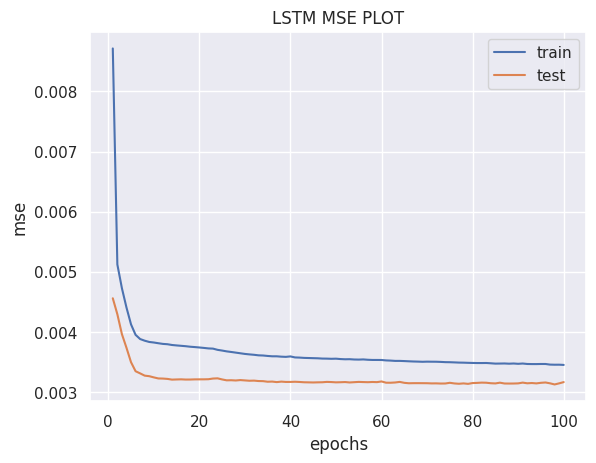

In [ ]:
#mse plot
plt.plot(range(1,1+epochs), history.history["loss"],label="train")
plt.plot(range(1,1+epochs), history.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("mse")
plt.legend()
plt.title("LSTM MSE PLOT")

Text(0.5, 1.0, 'LSTM MAE PLOT')

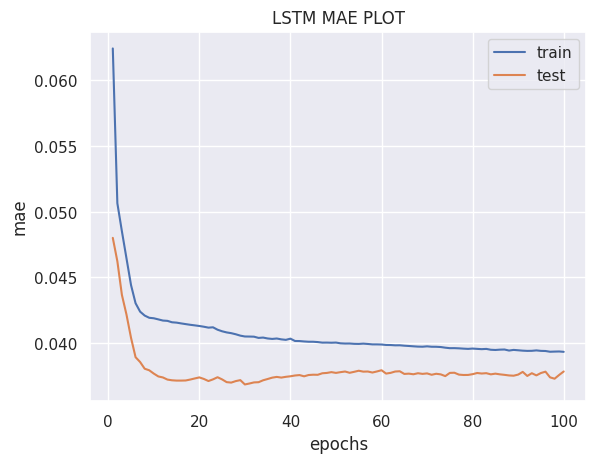

In [ ]:
#mae plot
plt.plot(range(1,1+epochs), history.history["mae"],label="train")
plt.plot(range(1,1+epochs), history.history["val_mae"],label="test")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.legend()
plt.title("LSTM MAE PLOT")

Text(0.5, 1.0, 'LSTM RMSE PLOT')

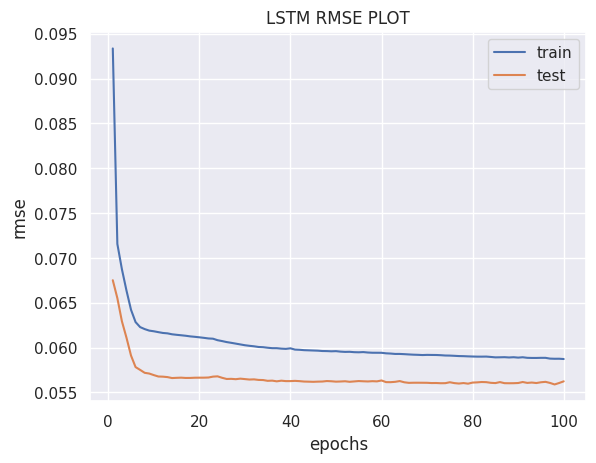

In [ ]:
#rmse plot
plt.plot(range(1,1+epochs), history.history["root_mean_squared_error"],label="train")
plt.plot(range(1,1+epochs), history.history["val_root_mean_squared_error"],label="test")
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.legend()
plt.title("LSTM RMSE PLOT")

Text(0.5, 1.0, 'LSTM R2_SCORE PLOT')

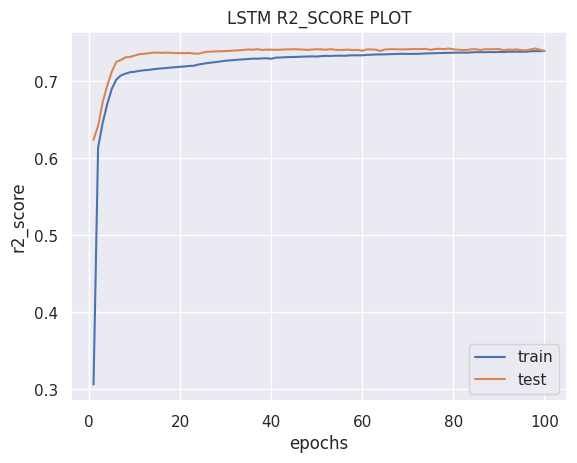

In [ ]:
#r2_score plot
plt.plot(range(1,1+epochs), history.history["r2_score"],label="train")
plt.plot(range(1,1+epochs), history.history["val_r2_score"],label="test")
plt.xlabel("epochs")
plt.ylabel("r2_score")
plt.legend()
plt.title("LSTM R2_SCORE PLOT")

In [ ]:
y_pred=model.predict(x_test)

32/32 [==============================] - 1s 3ms/step


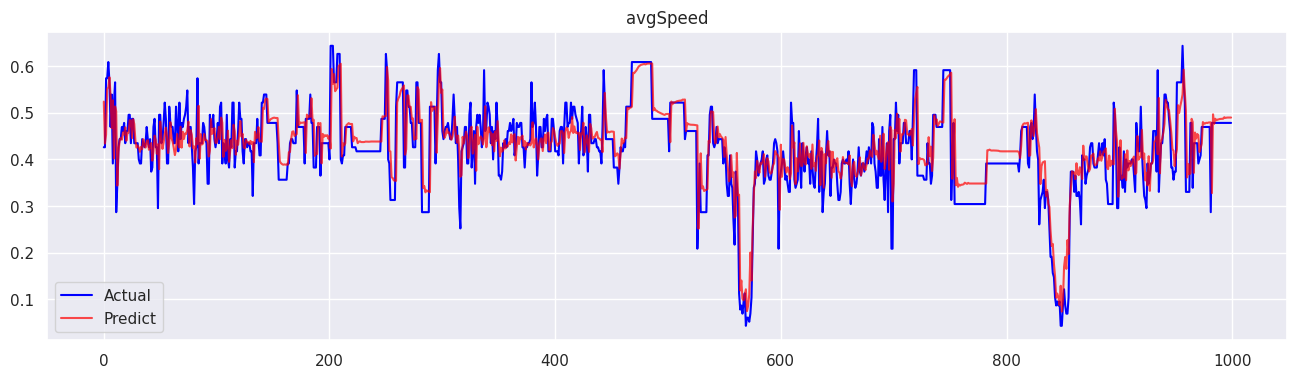

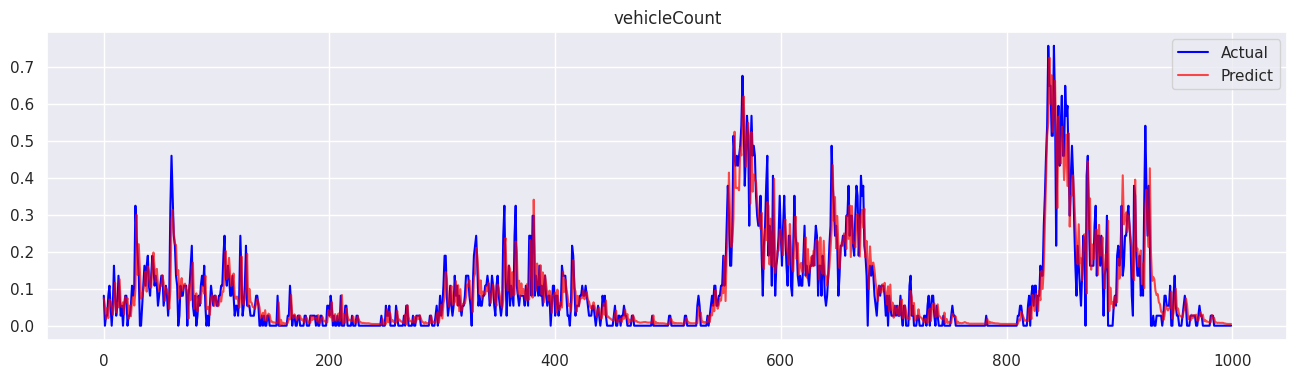

In [ ]:
cols = ["avgSpeed","vehicleCount"]
for i in range(len(y_test[0])):
  plt.figure(figsize=(16,4))
  plt.plot(y_test[:,i], color='blue',label='Actual')
  plt.plot(y_pred[:,i], alpha=0.7, color='red',label='Predict')
  # plt.title(f'plot {i}')
  plt.title(cols[i])
  # plt.xlabel('date')
  # plt.ylabel('Cumulative_solar_power')
  plt.legend()
  plt.show()

In [ ]:
# unscale data
y_pred_v_count_unscaled = scalers[2].inverse_transform(y_pred[:,[1]])
y_pred_avg_s_unscaled = scalers[1].inverse_transform(y_pred[:,[0]])
# apply formula on predicted values to predect traffic
pred = [float(i) for i in list(y_pred_avg_s_unscaled - 0.47*y_pred_v_count_unscaled>70)]
pred = np.array(pred)
act = data["traffic"].values[-1000:]

In [ ]:
LSTM_score=sum(pred == act) / 1000
LSTM_score

0.936

# GRU

In [ ]:
model2 = Sequential([
    tf.keras.layers.Bidirectional(
        tf.keras.layers.GRU(32,input_shape=[13, 2])
    ),
    Flatten(),
    Dense(8,activation="relu"),
    Dense(2)
    ]
)
model2.compile("adam",loss="mse",metrics=["mae","RootMeanSquaredError","R2Score"])
epochs = 100
early_stopping=EarlyStopping(monitor='loss',patience=50, mode='min',verbose=1)
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=epochs,shuffle=False,validation_data=(x_test,y_test))

Epoch 1/100
498/498 [==============================] - 12s 12ms/step - loss: 0.0163 - mae: 0.0936 - root_mean_squared_error: 0.1276 - r2_score: -0.3233 - val_loss: 0.0048 - val_mae: 0.0497 - val_root_mean_squared_error: 0.0694 - val_r2_score: 0.5960
Epoch 2/100
498/498 [==============================] - 7s 13ms/step - loss: 0.0049 - mae: 0.0500 - root_mean_squared_error: 0.0701 - r2_score: 0.6282 - val_loss: 0.0038 - val_mae: 0.0433 - val_root_mean_squared_error: 0.0617 - val_r2_score: 0.6882
Epoch 3/100
498/498 [==============================] - 5s 10ms/step - loss: 0.0043 - mae: 0.0455 - root_mean_squared_error: 0.0653 - r2_score: 0.6797 - val_loss: 0.0035 - val_mae: 0.0410 - val_root_mean_squared_error: 0.0593 - val_r2_score: 0.7126
Epoch 4/100
498/498 [==============================] - 5s 11ms/step - loss: 0.0040 - mae: 0.0434 - root_mean_squared_error: 0.0632 - r2_score: 0.6994 - val_loss: 0.0033 - val_mae: 0.0387 - val_root_mean_squared_error: 0.0576 - val_r2_score: 0.7273
Epoch 

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 64)                6912      
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 7450 (29.10 KB)
Trainable params: 7450 (29.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'mse')

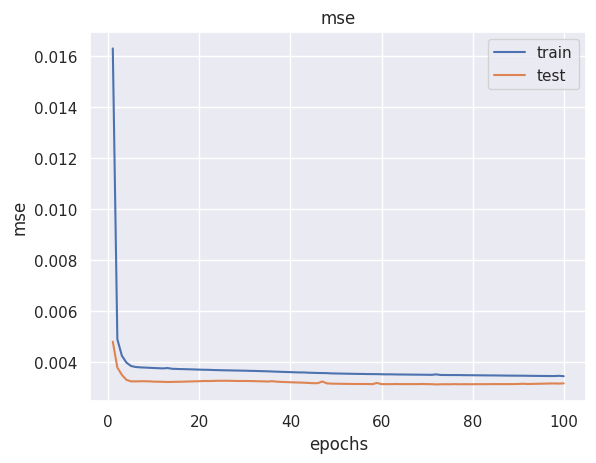

In [ ]:
#mse plot
plt.plot(range(1,1+epochs), history2.history["loss"],label="train")
plt.plot(range(1,1+epochs), history2.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("mse")
plt.legend()
plt.title("mse")

Text(0.5, 1.0, 'GRU MAE PLOT')

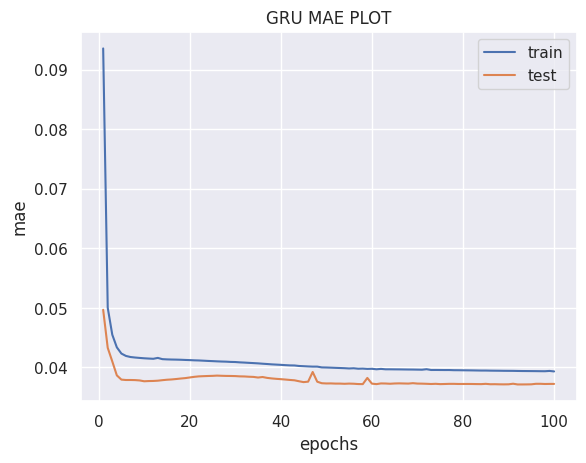

In [ ]:
#mae plot
plt.plot(range(1,1+epochs), history2.history["mae"],label="train")
plt.plot(range(1,1+epochs), history2.history["val_mae"],label="test")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.legend()
plt.title("GRU MAE PLOT")

Text(0.5, 1.0, 'GRU MRSE PLOT')

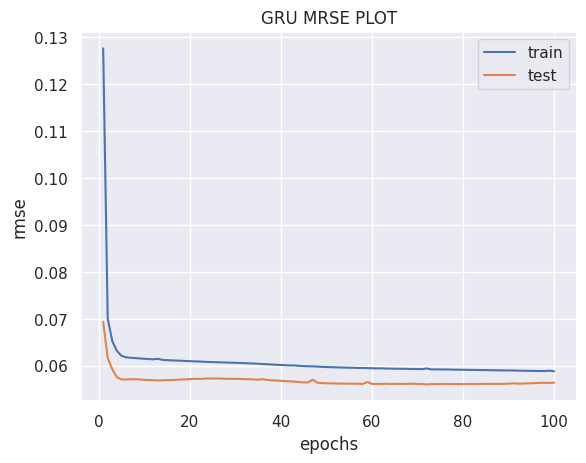

In [ ]:
#rmse plot
plt.plot(range(1,1+epochs), history2.history["root_mean_squared_error"],label="train")
plt.plot(range(1,1+epochs), history2.history["val_root_mean_squared_error"],label="test")
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.legend()
plt.title("GRU MRSE PLOT")

Text(0.5, 1.0, 'GRU R2_SCORE PLOT')

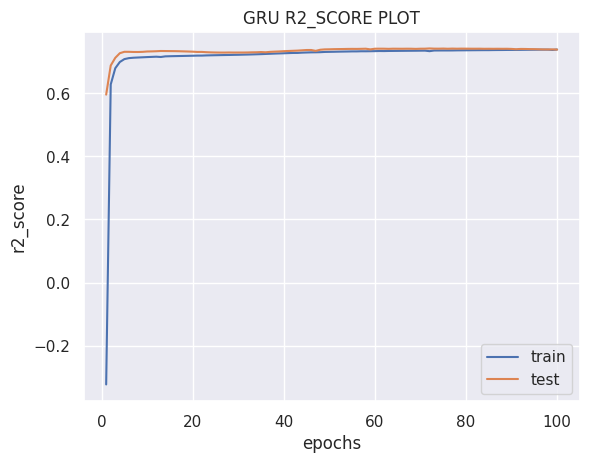

In [ ]:
#r2_score plot
plt.plot(range(1,1+epochs), history2.history["r2_score"],label="train")
plt.plot(range(1,1+epochs), history2.history["val_r2_score"],label="test")
plt.xlabel("epochs")
plt.ylabel("r2_score")
plt.legend()
plt.title("GRU R2_SCORE PLOT")

In [ ]:
y_pred2=model2.predict(x_test)

32/32 [==============================] - 1s 3ms/step


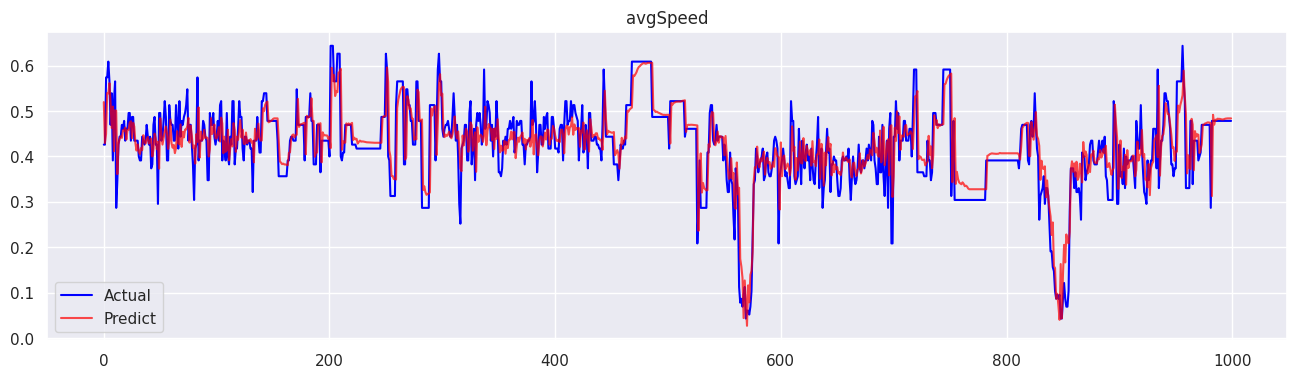

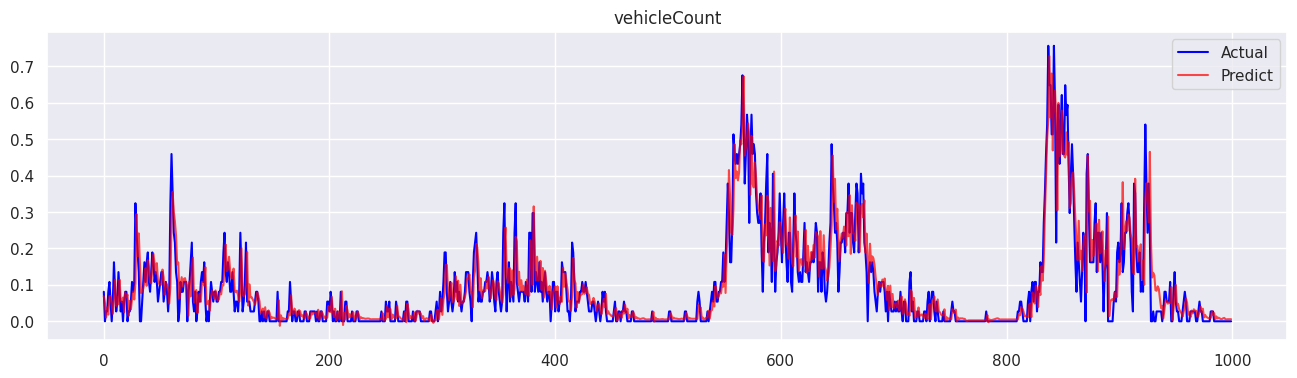

In [ ]:
cols = ["avgSpeed","vehicleCount"]
for i in range(len(y_test[0])):
  plt.figure(figsize=(16,4))
  plt.plot(y_test[:,i], color='blue',label='Actual')
  plt.plot(y_pred2[:,i], alpha=0.7, color='red',label='Predict')
  # plt.title(f'plot {i}')
  plt.title(cols[i])
  # plt.xlabel('date')
  # plt.ylabel('Cumulative_solar_power')
  plt.legend()
  plt.show()

In [ ]:
# unscale data
y_pred_v_count_unscaled = scalers[2].inverse_transform(y_pred2[:,[1]])
y_pred_avg_s_unscaled = scalers[1].inverse_transform(y_pred2[:,[0]])
# apply formula on predicted values
pred2 = [float(i) for i in list(y_pred_avg_s_unscaled - 0.47*y_pred_v_count_unscaled>70)]
pred2 = np.array(pred2)
act = data["traffic"].values[-1000:]

In [ ]:
GRU_score=sum(pred2 == act) / 1000
GRU_score

0.929

# RNN



In [ ]:
from keras.layers import SimpleRNN
model3 = Sequential([
    SimpleRNN(32,Flatten(input_shape=[13, 2])),

    Dense(8,activation="relu"),

    Dense(2)
])

model3.compile(optimizer="adam", loss="mse",metrics=["mae","RootMeanSquaredError","R2Score"])

epochs = 100
early_stopping = EarlyStopping(monitor='loss', patience=25, mode='min', verbose=1)

history3 = model3.fit(x_train, y_train, batch_size=32, epochs=epochs, shuffle=False, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/100
498/498 [==============================] - 4s 5ms/step - loss: 0.0096 - mae: 0.0679 - root_mean_squared_error: 0.0979 - r2_score: 0.2667 - val_loss: 0.0049 - val_mae: 0.0499 - val_root_mean_squared_error: 0.0697 - val_r2_score: 0.5921
Epoch 2/100
498/498 [==============================] - 2s 4ms/step - loss: 0.0053 - mae: 0.0530 - root_mean_squared_error: 0.0728 - r2_score: 0.5987 - val_loss: 0.0041 - val_mae: 0.0456 - val_root_mean_squared_error: 0.0638 - val_r2_score: 0.6613
Epoch 3/100
498/498 [==============================] - 2s 4ms/step - loss: 0.0048 - mae: 0.0500 - root_mean_squared_error: 0.0691 - r2_score: 0.6389 - val_loss: 0.0039 - val_mae: 0.0446 - val_root_mean_squared_error: 0.0622 - val_r2_score: 0.6789
Epoch 4/100
498/498 [==============================] - 4s 9ms/step - loss: 0.0045 - mae: 0.0479 - root_mean_squared_error: 0.0668 - r2_score: 0.6629 - val_loss: 0.0036 - val_mae: 0.0429 - val_root_mean_squared_error: 0.0603 - val_r2_score: 0.6992
Epoch 5/100


In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1402 (5.48 KB)
Trainable params: 1402 (5.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 1.0, 'mse')

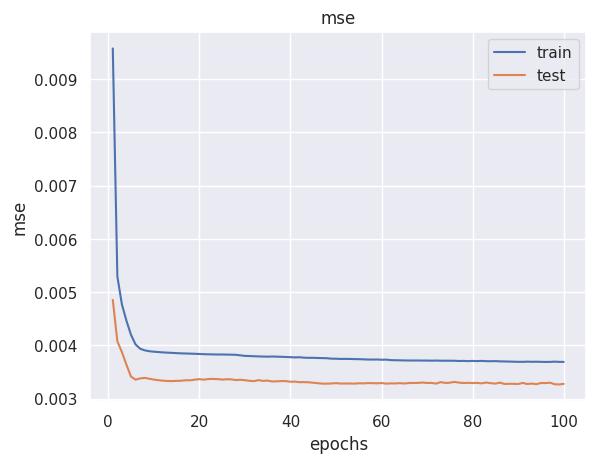

In [ ]:
#mse plot
plt.plot(range(1,1+epochs), history3.history["loss"],label="train")
plt.plot(range(1,1+epochs), history3.history["val_loss"],label="test")
plt.xlabel("epochs")
plt.ylabel("mse")
plt.legend()
plt.title("RNN MSE PLOT")

Text(0.5, 1.0, 'RNN MSE PLOT')

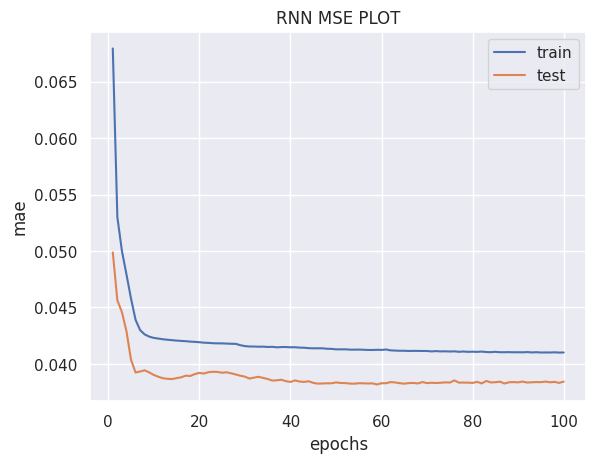

In [ ]:
#mae plot
plt.plot(range(1,1+epochs), history3.history["mae"],label="train")
plt.plot(range(1,1+epochs), history3.history["val_mae"],label="test")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.legend()
plt.title("RNN MSE PLOT")

Text(0.5, 1.0, 'RNN RMSE PLOT')

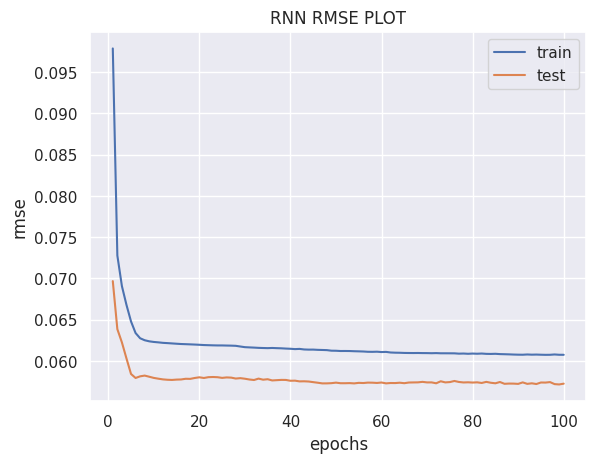

In [ ]:
#rmse plot
plt.plot(range(1,1+epochs), history3.history["root_mean_squared_error"],label="train")
plt.plot(range(1,1+epochs), history3.history["val_root_mean_squared_error"],label="test")
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.legend()
plt.title("RNN RMSE PLOT")

Text(0.5, 1.0, 'RNN R2_SCORE PLOT')

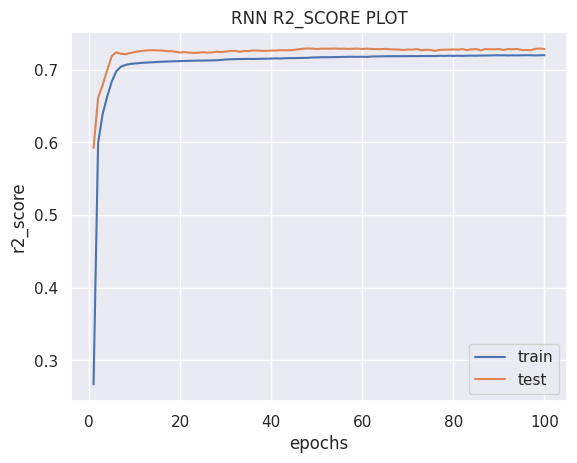

In [ ]:
#r2_score plot
plt.plot(range(1,1+epochs), history3.history["r2_score"],label="train")
plt.plot(range(1,1+epochs), history3.history["val_r2_score"],label="test")
plt.xlabel("epochs")
plt.ylabel("r2_score")
plt.legend()
plt.title("RNN R2_SCORE PLOT")

In [ ]:
y_pred3=model3.predict(x_test)

32/32 [==============================] - 0s 3ms/step


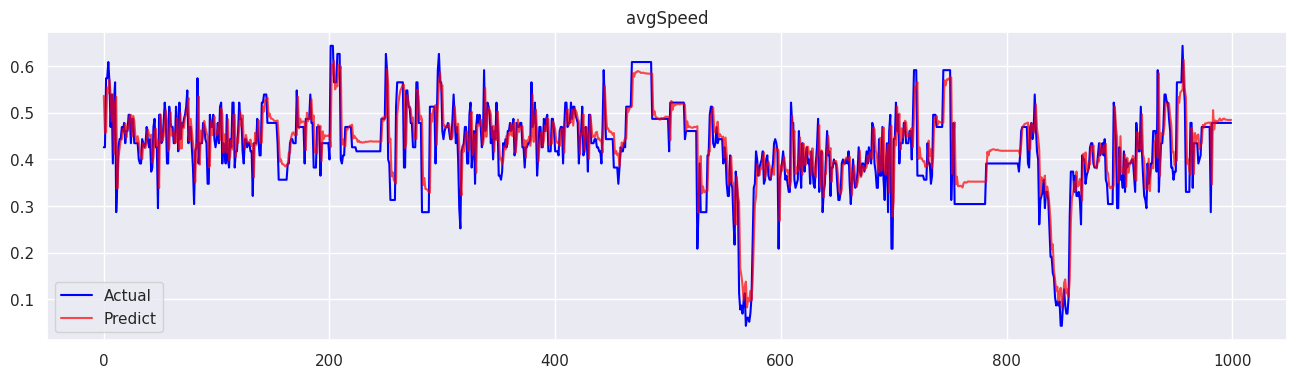

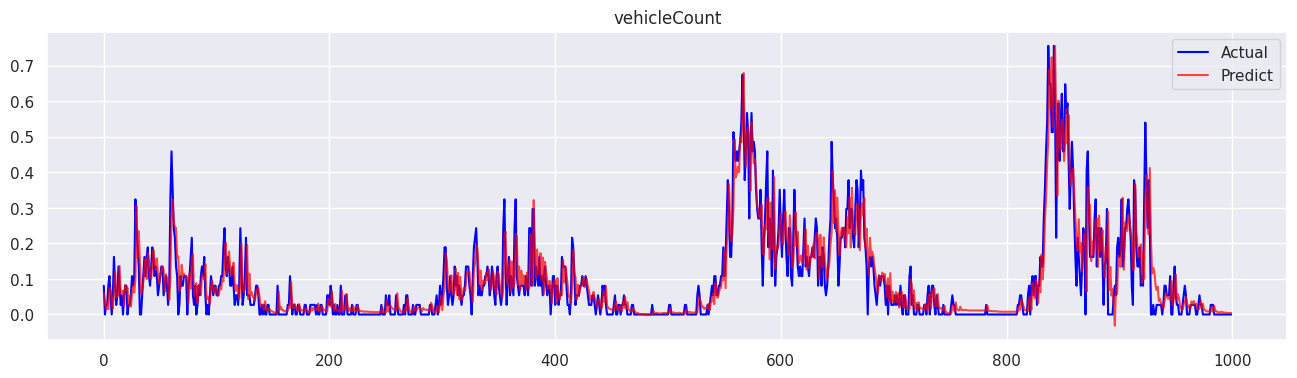

In [ ]:
cols = ["avgSpeed","vehicleCount"]
for i in range(len(y_test[0])):
  plt.figure(figsize=(16,4))
  plt.plot(y_test[:,i], color='blue',label='Actual')
  plt.plot(y_pred3[:,i], alpha=0.7, color='red',label='Predict')
  # plt.title(f'plot {i}')
  plt.title(cols[i])
  # plt.xlabel('date')
  # plt.ylabel('Cumulative_solar_power')
  plt.legend()
  plt.show()

In [ ]:
# unscale data
y_pred_v_count_unscaled_rnn = scalers[2].inverse_transform(y_pred3[:,[1]])
y_pred_avg_s_unscaled_rnn = scalers[1].inverse_transform(y_pred3[:,[0]])
# apply formula on predicted values
pred3 = [float(i) for i in list(y_pred_avg_s_unscaled_rnn - 0.47*y_pred_v_count_unscaled_rnn>70)]
pred3 = np.array(pred3)
act = data["traffic"].values[-1000:]

In [ ]:
RNN_score=sum(pred3 == act) / 1000
RNN_score

0.927

# Pipeline


In [ ]:
print(LSTM_score)
print(GRU_score)
print(RNN_score)

0.936
0.929
0.927


In [ ]:
#after fit and test we use GRU model so we create GRU fonction that take pred and using in new_data
new_x = data[1200:1212]
new_x

,avgMeasuredTime,avgSpeed,vehicleCount,day,month,year,dayofweek,hour,minute,weekend,traffic
1200,56,66,6,5,8,2014,1,12,10,0,0
1201,68,54,8,5,8,2014,1,12,15,0,0
1202,68,54,12,5,8,2014,1,12,20,0,0
1203,70,52,10,5,8,2014,1,12,25,0,0
1204,63,58,8,5,8,2014,1,12,30,0,0
1205,63,58,6,5,8,2014,1,12,35,0,0
1206,59,62,9,5,8,2014,1,12,40,0,0
1207,57,65,10,5,8,2014,1,12,45,0,0
1208,58,63,9,5,8,2014,1,12,50,0,0
1209,74,50,6,5,8,2014,1,13,0,0,0


In [ ]:
#we create our Pipeline(fonction in this case)
def traffic_predicter(new_x):
  # convert to numpy
  new_x = new_x[["avgSpeed","vehicleCount"]].values
  # scale the data
  new_x[:,[0]] = scalers[1].transform(new_x[:,[0]])
  new_x[:,[1]] = scalers[2].transform(new_x[:,[1]])
  # convert to tensorflow
  new_x = convert(new_x)
  # add extra dimension (becase batch_size = 1)
  new_x = tf.expand_dims(new_x, axis=0)
  # predict
  out = model2.predict(new_x)
  # unscale data
  y_pred_v_count_unscaled = scalers[2].inverse_transform(out[:,[1]])
  y_pred_avg_s_unscaled = scalers[1].inverse_transform(out[:,[0]])
  # apply formula on predicted values
  prediction = y_pred_avg_s_unscaled - 0.47*y_pred_v_count_unscaled > 70
  return prediction[0][0]

In [ ]:
traffic_predicter(new_x)

1/1 [==============================] - 0s 35ms/step


False